# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('yeast.data', header=None, delim_whitespace=True)

# Display the first few rows of the DataFrame
print(df.head())

            0     1     2     3     4    5    6     7     8    9
0  ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22  MIT
1  ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  MIT
2  ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  MIT
3  AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  NUC
4  AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22  MIT


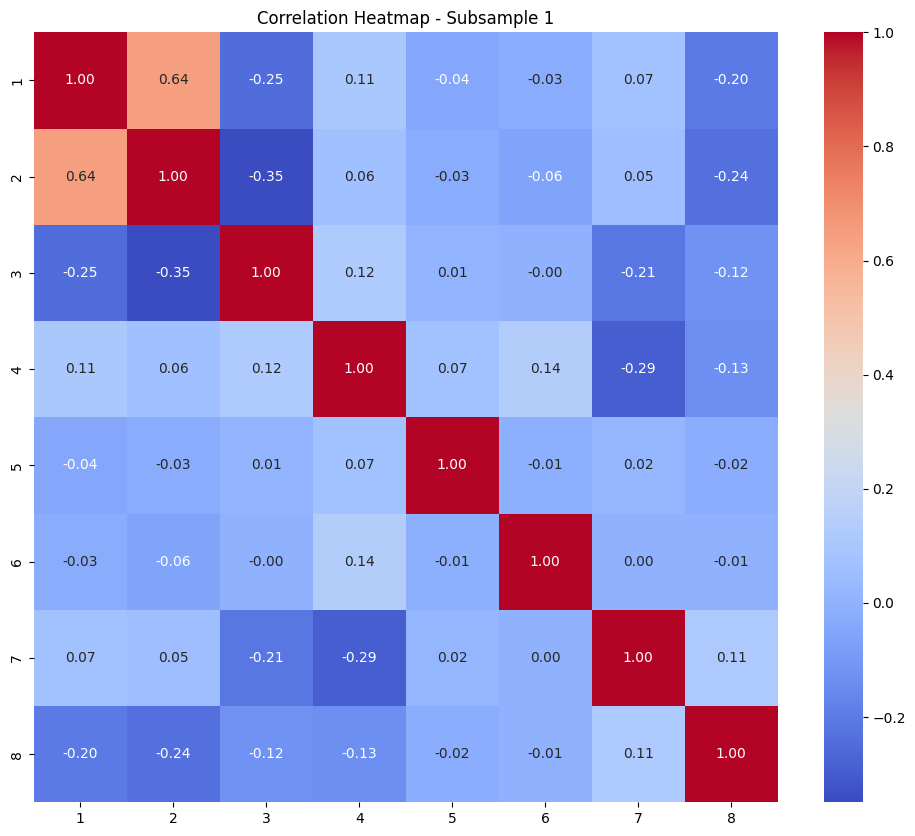

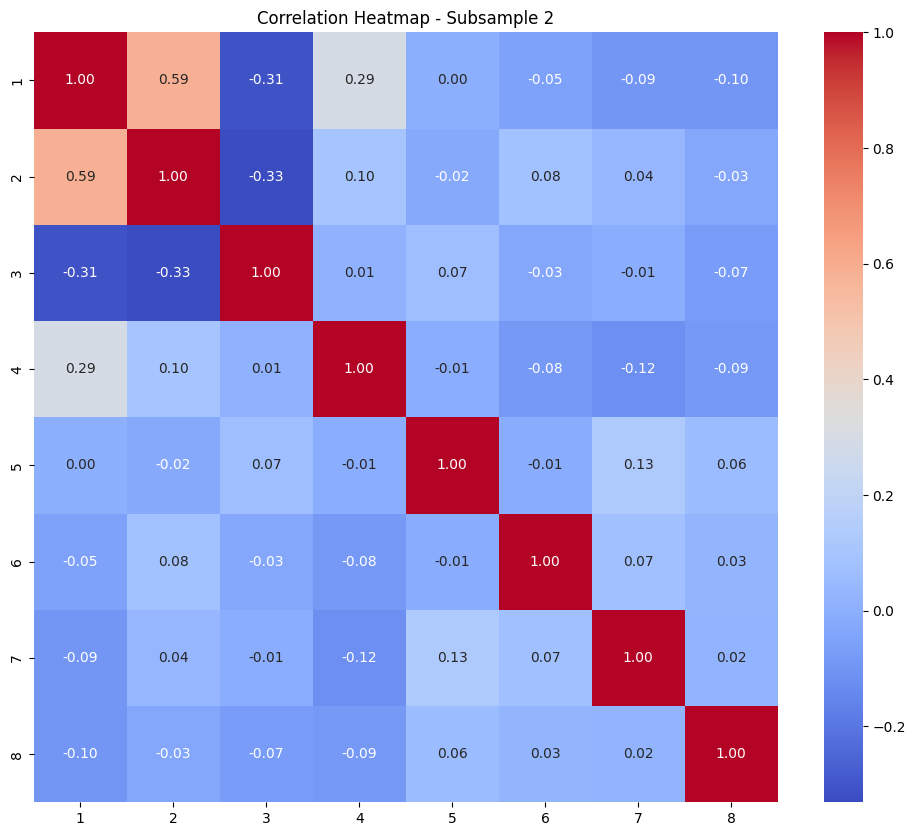

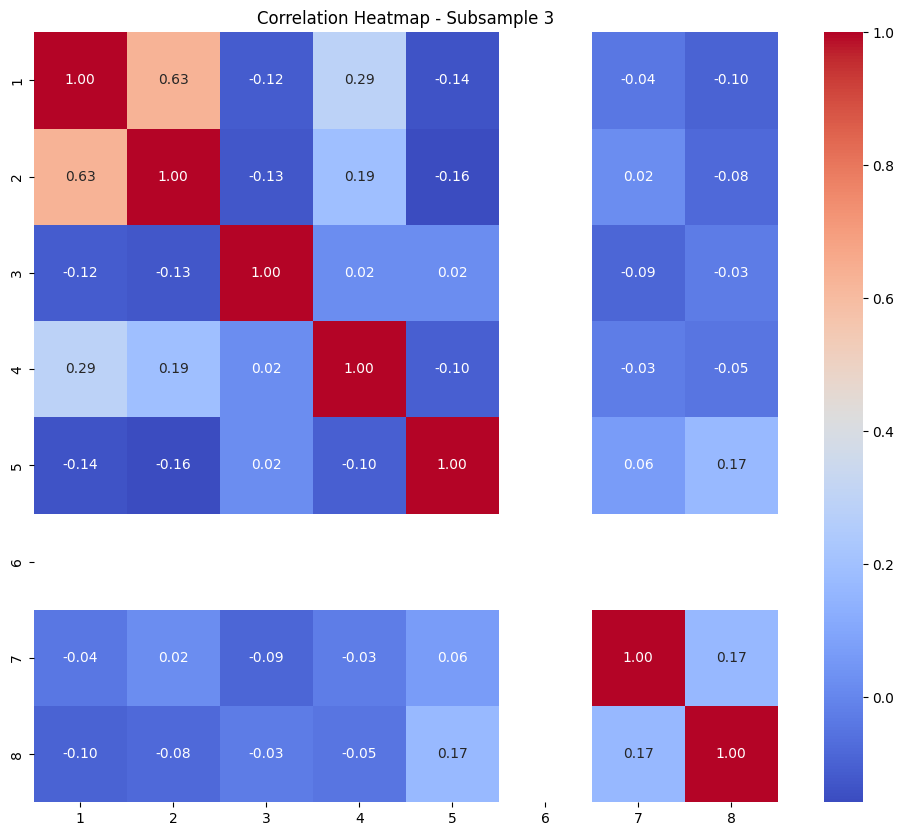

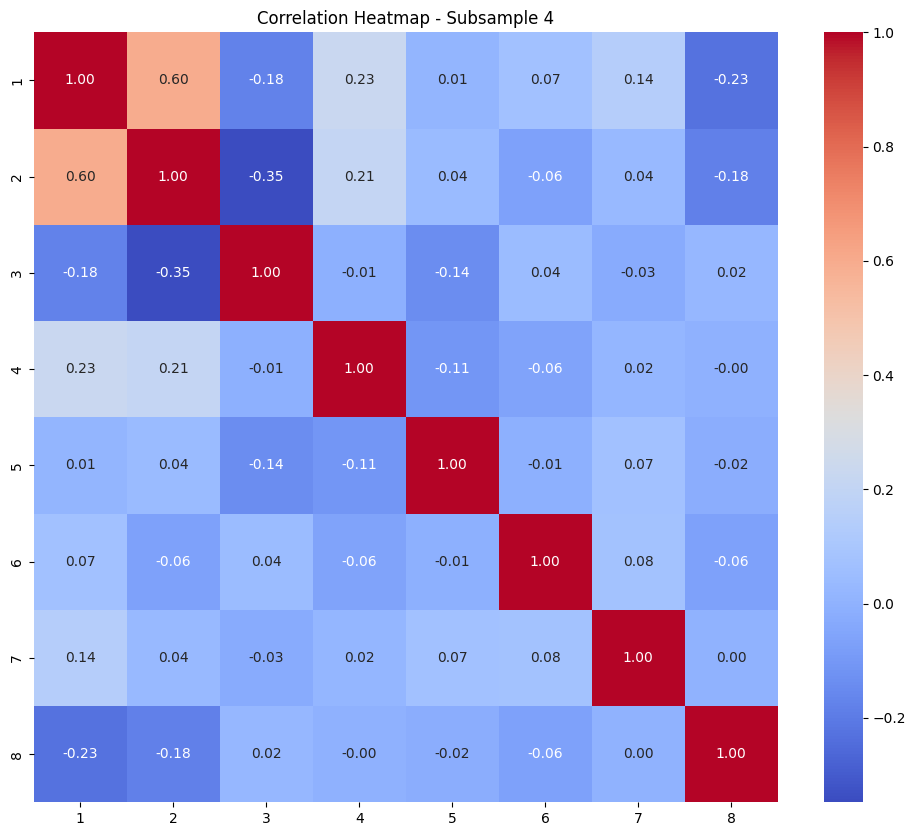

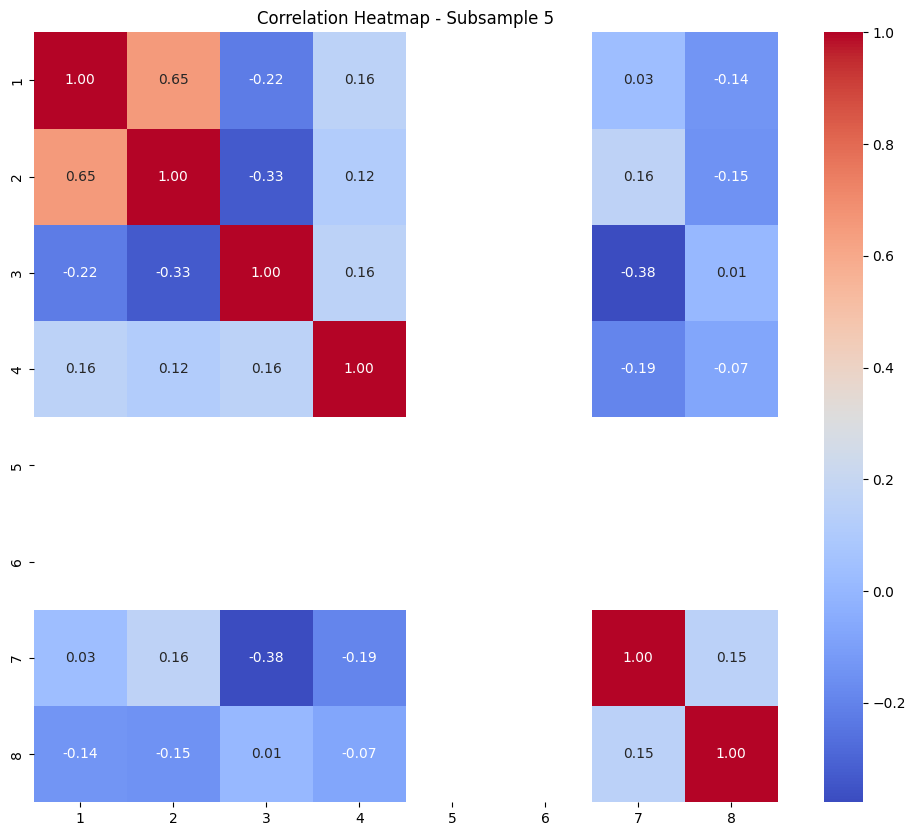

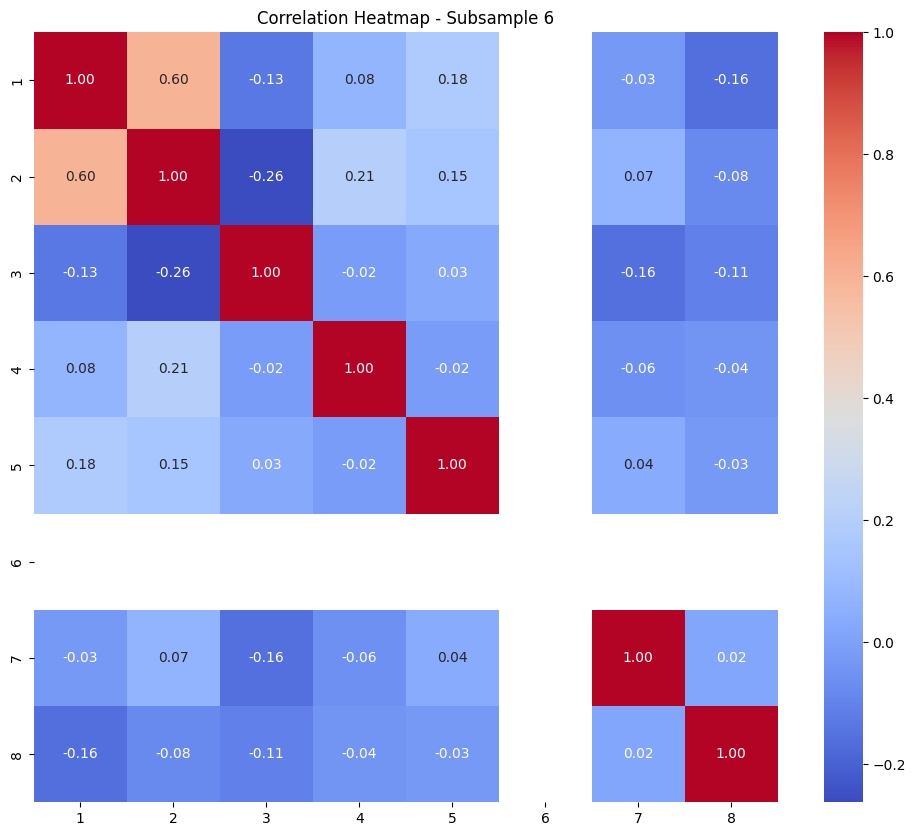

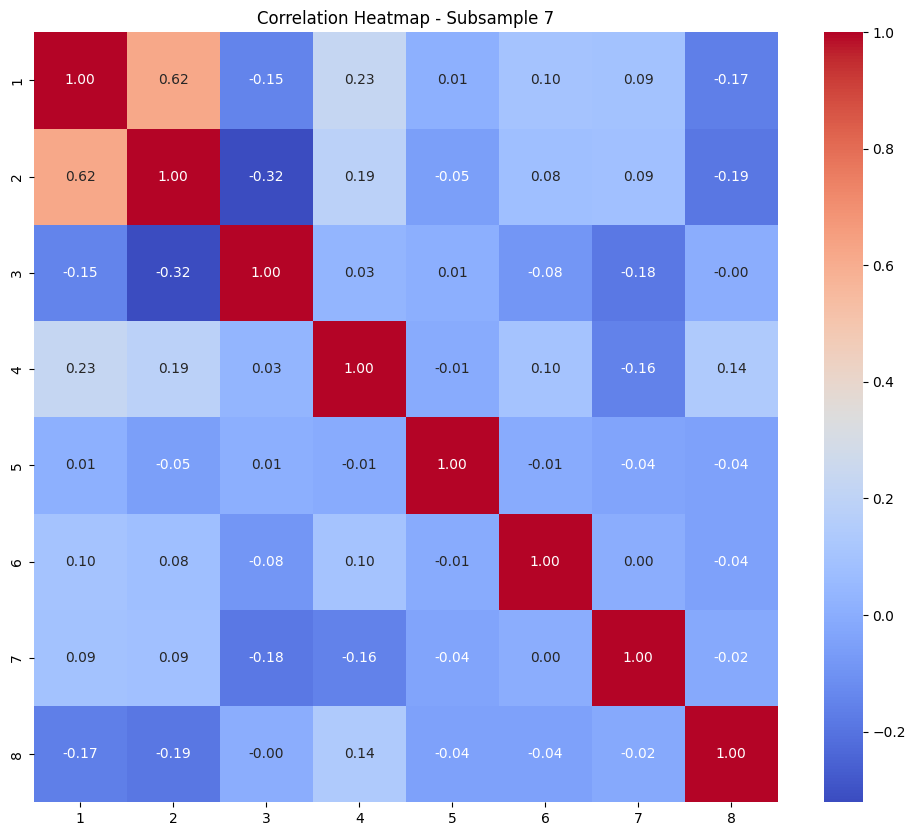

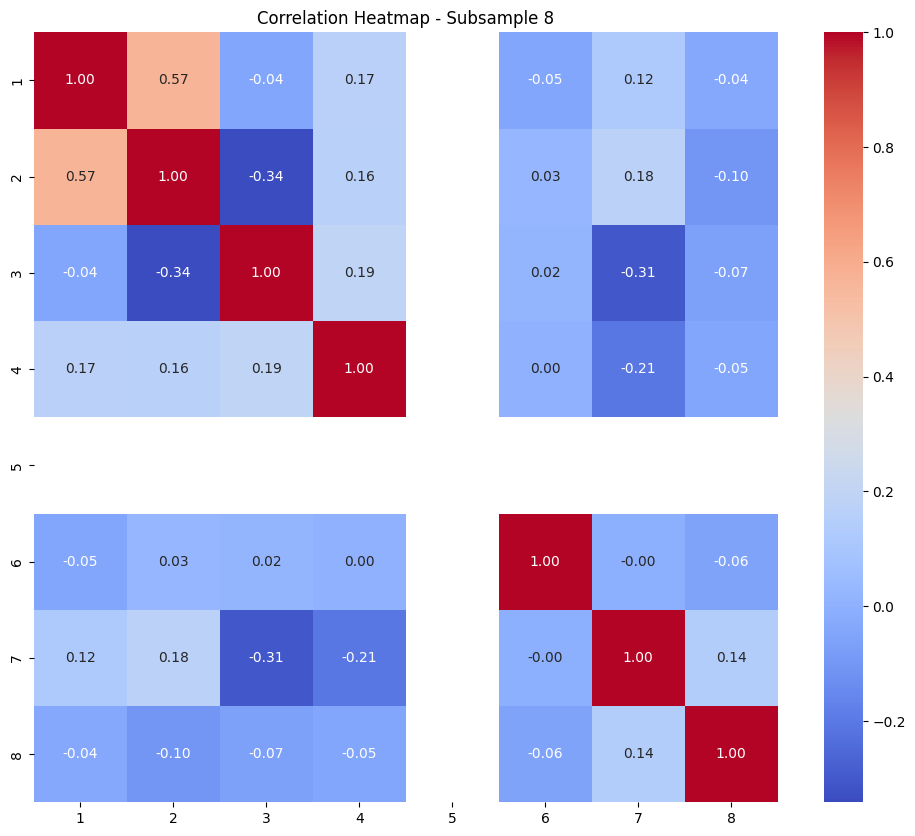

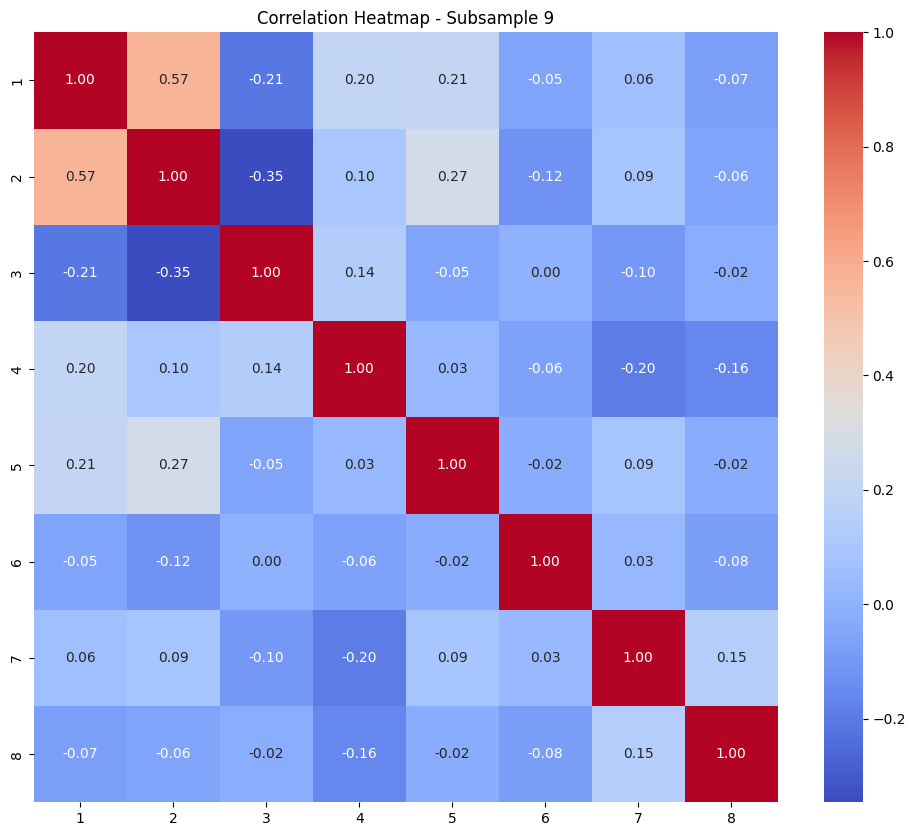

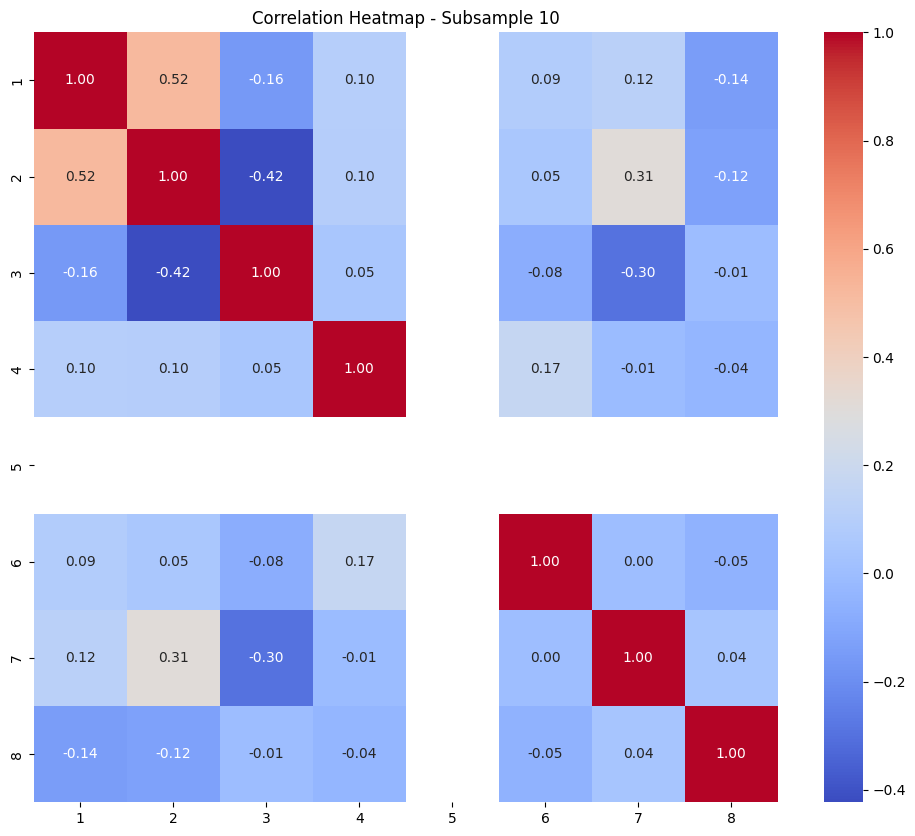

In [10]:
# Drop rows with non-numeric values
yeast_numeric = df.dropna().iloc[:, 1:-1].select_dtypes(include=[np.number])

# Check if the DataFrame is empty
if not yeast_numeric.empty:
    # Define the number of subsamples
    num_subsamples = 10

    # Define the size of each subsample (moderately sized)
    subsample_size = len(yeast_numeric) // num_subsamples

    # Create a list to store the correlation plots
    correlation_plots = []

    # Randomly select subsamples and create correlation plots
    for i in range(num_subsamples):
        # Randomly select rows for the subsample
        subsample_indices = np.random.choice(yeast_numeric.index, size=subsample_size, replace=False)

        # Extract the subsample from the dataset
        subsample = yeast_numeric.loc[subsample_indices]

        # Calculate the correlation matrix for the subsample
        correlation_matrix = subsample.corr()

        # Plot the correlation heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Correlation Heatmap - Subsample {i+1}')
        plt.show()
else:
    print("DataFrame yeast_numeric is empty. Check your data.")


**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**
**TASK (Regression): If your problem is a regression problem visually the distribution of your target variabe**

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


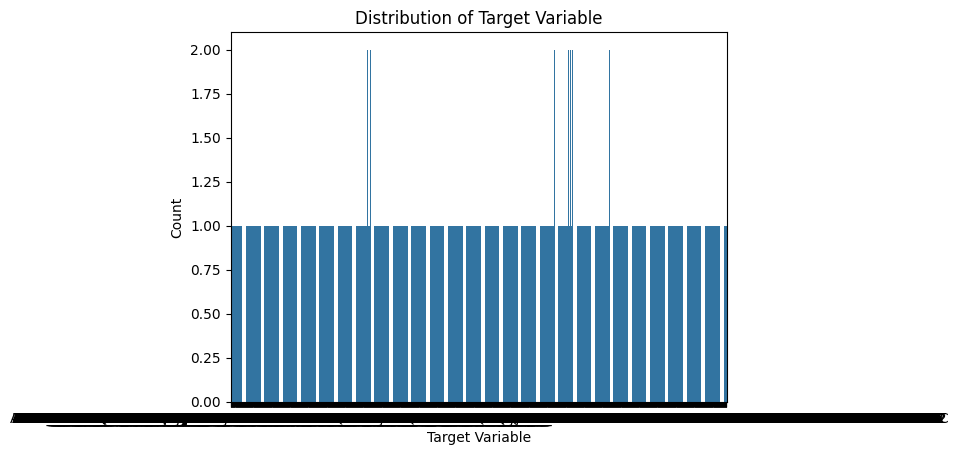

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the column names in your DataFrame
print(df.columns)


sns.countplot(x=yeast.columns[-1], data=yeast)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

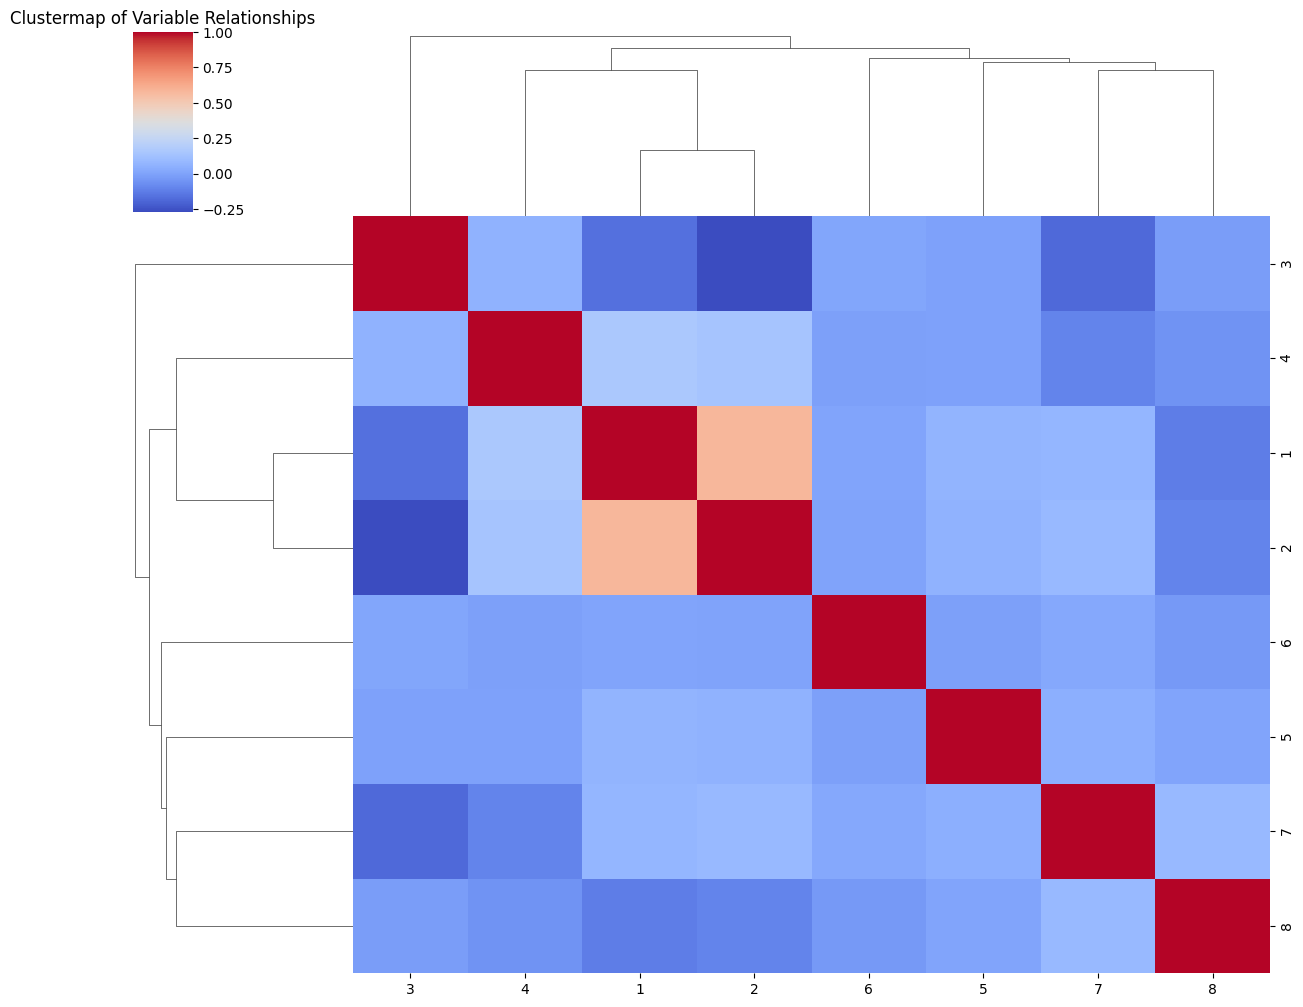

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
df_numeric = df.select_dtypes(include='number')

# Create the clustermap
sns.clustermap(df_numeric.corr(), cmap='coolwarm', figsize=(12, 10))
plt.title('Clustermap of Variable Relationships')
plt.show()

**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Prepare the Data
target_column = df_numeric.iloc[:, -1]

# Extract features (X) and target (y)
# Drop the first column from df_numeric and assign the result to X
X = df_numeric.iloc[:, 1:]
# Set y as the last column of df_numeric
y = df_numeric.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build a Baseline SVM Model
svm_baseline = SVC()
svm_baseline.fit(X_train, y_train)
baseline_predictions = svm_baseline.predict(X_test)

# Evaluate baseline model
print("Baseline SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, baseline_predictions))
print("Classification Report:\n", classification_report(y_test, baseline_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, baseline_predictions))

# 3. Tune Hyperparameters using GridSearch
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']}
svm_grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
svm_grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", svm_grid_search.best_params_)

# 4. Evaluate Model Performance
grid_predictions = svm_grid_search.predict(X_test)

print("\nTuned SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, grid_predictions))
print("Classification Report:\n", classification_report(y_test, grid_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, grid_predictions))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.